# Unit 5 - Financial Planning - Marc Julies

In [57]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [58]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [61]:
# Set current amount of crypto assets
my_btc_amount = 1.2
my_eth_amount = 5.3

In [62]:
#Function that executes Alternative Crypto API and returns the price in the specified currency
def get_crypto_price(ticker, currency):
    #Check if the ticker and currency value is provided
    if ticker != "" and currency != "":
        crytpo_url =  "https://api.alternative.me/v2/ticker/" + ticker + "/?convert=" + currency
        crypto_response = requests.get(crytpo_url).json()
        #Under the data key, the first is the key id
        crypto_id = list(crypto_response['data'].keys())[0] # The first key is the crypto id within API
        crypto_price = crypto_response['data'][crypto_id]['quotes'][currency]['price']
        #crypto_price = crypto_response
    else:
        #Otherwise we return the value of 0
        crypto_price = 0
    
    return crypto_price

In [63]:
# Fetch current BTC price
# We are going to read the price in Canadian Dollars CAD
current_btc_price = get_crypto_price(ticker='Bitcoin', currency='CAD')
current_btc_price

49172.4541

In [10]:
# Fetch current ETH price
current_eth_price = get_crypto_price(ticker='Ethereum', currency='CAD')
current_eth_price

3815.96745

In [64]:
# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc_amount
my_eth_value = current_eth_price * my_eth_amount

# Print current crypto wallet balance
print(f"The current value of your {my_btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth_amount} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59006.94
The current value of your 5.3 ETH is $20224.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [66]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [67]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [68]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [69]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()

In [70]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-22 04:00:00+00:00,102.73,103.1800,102.67,102.94,9152665,31498,102.925863,AGG
2022-04-22 04:00:00+00:00,436.94,438.0825,425.44,426.04,132156403,972064,429.813156,SPY


In [71]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis="columns")
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis="columns")

In [73]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis="columns", keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-22 04:00:00+00:00  102.73  103.18  102.67  102.94  9152665   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-04-22 04:00:00+00:00       31498  102.925863  436.94  438.0825  425.44   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-22 04:00:00+00:00  426.04  132156403      972064  429.813156

In [74]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.94
Current SPY closing price: $426.04


In [75]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21302.00
The current value of your 200 AGG shares is $20588.00


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

#Create a dictionary object for data
savings_data_input = {"amount" : [total_crypto_value, total_shares_value]}


#Savings Data Frame
df_savings = pd.DataFrame(data = savings_data_input, index=['crypto', 'shares'])


# Display savings DataFrame
display(df_savings)

,amount
crypto,79231.572405
shares,41890.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

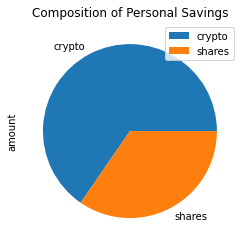

In [77]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health
#Enough savings
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif (total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [79]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-22', tz='America/New_York').isoformat()

In [80]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis="columns")
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis="columns")


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis="columns", keys=['AGG','SPY'])

# Preview DataFrame
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [81]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# 40% bonds(AGG), 60% stocks(SPY) and 500 simulations
MC_stocks_bonds = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [82]:
# Printing the simulation input data
MC_stocks_bonds.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_bonds.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001607,1.000713,1.005441,0.992775,1.008788,0.996737,0.991379,1.021475,1.011701,1.004984,...,0.999443,0.999098,1.002978,0.997734,0.997833,0.997459,0.994155,0.999249,1.017286,1.011882
2,1.002844,1.007037,1.012971,1.002071,0.998903,0.992040,0.985748,1.023190,1.002452,1.011691,...,0.995944,0.989943,0.998879,0.980875,1.014997,1.002662,0.990475,1.008901,1.006683,1.005546
3,1.009438,1.001175,1.016827,1.002771,0.996858,1.000258,0.988580,1.028876,1.006016,1.012873,...,0.998175,0.988769,1.002945,0.978311,1.022443,0.997316,0.989668,1.005879,1.007046,1.000670
4,1.006136,1.006211,1.008422,1.007621,0.992607,1.006080,0.992951,1.028596,1.005675,1.021823,...,1.006876,0.994670,1.007594,0.985102,1.013371,0.990349,0.983778,1.011208,1.003476,1.012742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.495915,10.066854,12.546873,8.485336,9.004059,8.141750,13.413691,4.659778,24.295654,5.166535,...,7.310148,8.613543,4.635970,16.336868,5.822359,10.865024,10.815263,6.446012,5.436404,2.073244
7557,10.471140,9.995549,12.549396,8.494766,9.001580,8.107091,13.583610,4.650480,24.137530,5.195104,...,7.414609,8.601528,4.644812,16.343297,5.899071,10.811412,10.794711,6.453414,5.415708,2.058711
7558,10.472349,9.996870,12.602185,8.558635,8.955567,8.136709,13.661494,4.623631,23.989116,5.170043,...,7.463597,8.609221,4.633853,16.418811,5.868623,10.914898,10.773393,6.450445,5.440059,2.075442
7559,10.415490,9.954448,12.642744,8.527089,8.952967,8.179608,13.636680,4.590093,24.026449,5.188067,...,7.500928,8.556749,4.603272,16.561929,5.864301,10.888656,10.855525,6.422291,5.458761,2.067123


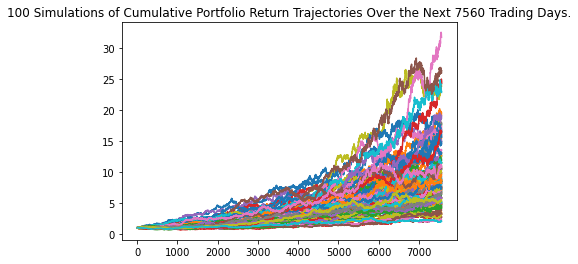

In [36]:
# Plot simulation outcomes
line_plot = MC_stocks_bonds.plot_simulation()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


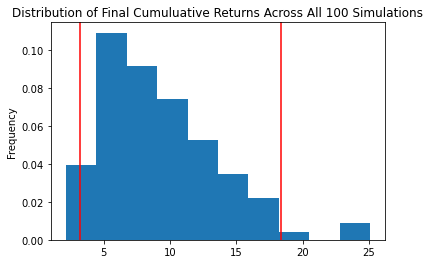

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks_bonds.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stocks_bonds.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           100.000000
mean              9.295052
std               4.472979
min               2.154188
25%               6.128208
50%               8.681415
75%              11.795689
max              25.083244
95% CI Lower      3.260170
95% CI Upper     18.400022
Name: 7560, dtype: float64


C:\Users\MarcJulies\Jupyter-Workspace\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65203.41 and $368000.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# 25% bonds(AGG), 75% stocks(SPY) and 500 simulations
MC_early_retirement_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = 100,
    num_trading_days = 252*5
)

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_retirement_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999353,1.009327,0.996211,1.005508,0.996002,1.012326,0.996955,0.994922,0.997332,0.996655,...,0.990700,0.983652,1.001824,0.999629,0.986993,1.008848,1.008239,0.998897,1.000516,0.988877
2,1.001254,1.007659,0.993765,0.999589,1.007303,1.009142,0.995387,0.982316,0.981578,0.994712,...,0.990897,0.978675,0.992857,0.995616,0.980804,1.009720,1.015017,1.010214,1.002099,0.990206
3,1.005323,0.992782,1.003172,1.006776,1.008495,1.010279,0.990887,0.984768,0.988442,1.011456,...,0.998379,0.981925,0.999000,1.005474,0.984076,1.007487,1.023174,1.022429,0.992306,0.989018
4,1.000341,0.994568,0.995334,0.988534,1.025611,1.012521,0.997545,0.995374,0.987781,1.014334,...,0.989192,0.977483,1.013452,0.988996,0.990112,1.021401,1.018973,1.028906,0.997910,0.990748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.231127,1.925805,2.537854,2.257890,1.223577,1.513308,1.285908,1.911714,1.864352,1.348654,...,1.205755,2.226773,1.144503,1.436293,1.206485,1.486530,1.617897,1.468973,1.443566,0.864749
1257,1.234584,1.937364,2.529125,2.243774,1.208754,1.503430,1.270604,1.900372,1.840469,1.337577,...,1.226497,2.241864,1.146866,1.427657,1.208315,1.493090,1.612490,1.477384,1.427866,0.852635
1258,1.244248,1.915534,2.536159,2.220198,1.228586,1.502355,1.280333,1.893685,1.815907,1.347297,...,1.240088,2.239244,1.148212,1.441957,1.201467,1.470099,1.596893,1.486774,1.429173,0.849590
1259,1.232913,1.931084,2.578117,2.229028,1.225422,1.491700,1.281037,1.887738,1.810556,1.327987,...,1.244508,2.271687,1.154535,1.449016,1.216882,1.496864,1.593581,1.502783,1.427223,0.863051


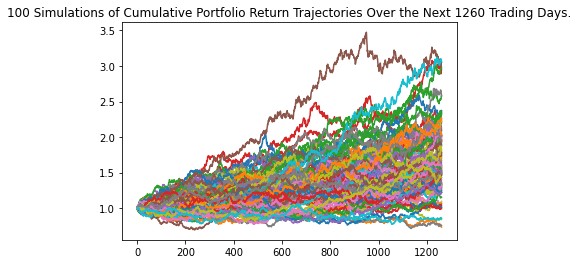

In [44]:
# Plot simulation outcomes
line_plot = MC_early_retirement_5_years.plot_simulation()

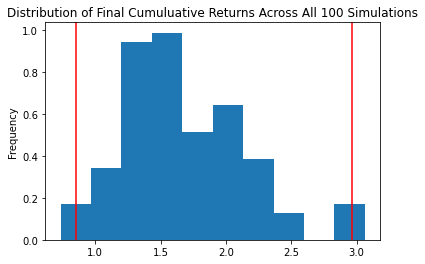

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_early_retirement_5_years.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_early_retirement_5_years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           100.000000
mean              1.671174
std               0.496495
min               0.733618
25%               1.325467
50%               1.552761
75%               1.995572
max               3.063504
95% CI Lower      0.848899
95% CI Upper      2.967803
Name: 1260, dtype: float64


C:\Users\MarcJulies\Jupyter-Workspace\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [47]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50933.97 and $178068.21


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# 20% bonds(AGG), 80% stocks(SPY) and 500 simulations
MC_early_retirement_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_retirement_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998322,1.007378,0.992024,0.992243,0.998233,1.001500,1.009291,0.995840,0.995043,1.010051,...,0.998282,1.009556,1.007477,1.006758,1.013737,0.998613,1.017810,0.996341,1.007860,0.992719
2,1.007050,1.024181,0.992950,0.986784,1.003509,1.005479,0.997131,0.985028,0.983158,1.014105,...,1.014362,1.019378,1.021108,1.010368,1.026984,0.999358,1.019397,1.020487,1.016362,1.003799
3,1.005590,1.031864,0.985425,0.975607,1.020720,1.021183,0.990094,0.999511,0.981892,1.022266,...,1.018951,1.016415,1.018954,1.010287,1.039033,1.013797,1.028167,1.001722,1.035106,0.995122
4,1.000077,1.031846,0.988050,0.968454,1.007649,1.014527,0.966584,1.003426,0.996828,1.010000,...,1.010783,1.022386,1.025020,1.002624,1.038689,1.028566,1.027796,0.991936,1.057977,0.986460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.877361,3.352012,2.755130,3.325999,6.700542,3.056792,7.912834,3.364470,6.122018,3.421876,...,3.021325,1.939412,3.178613,3.803453,2.665108,1.796546,0.924960,3.255251,1.669724,2.222421
2517,2.882073,3.275336,2.781129,3.353484,6.710644,3.039202,7.814246,3.354244,6.121535,3.403712,...,3.003607,1.919752,3.170756,3.805144,2.678696,1.810466,0.932844,3.276515,1.638857,2.212843
2518,2.894517,3.310136,2.778249,3.413758,6.793447,3.059244,7.789607,3.393602,6.130633,3.346923,...,3.027428,1.902854,3.118387,3.829936,2.688568,1.786415,0.940988,3.305415,1.642764,2.205443
2519,2.909204,3.292919,2.759492,3.411870,6.831171,3.032164,7.746303,3.368868,6.164517,3.334043,...,2.990286,1.890673,3.131463,3.849471,2.707761,1.785422,0.945208,3.276145,1.645776,2.218065


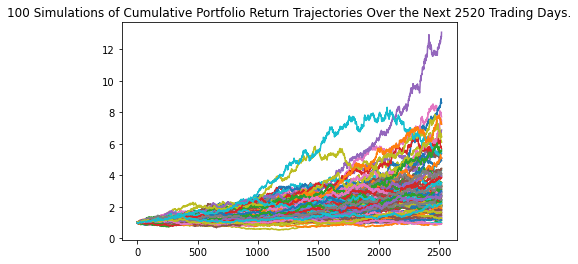

In [52]:
# Plot simulation outcomes
line_plot = MC_early_retirement_10_years.plot_simulation()

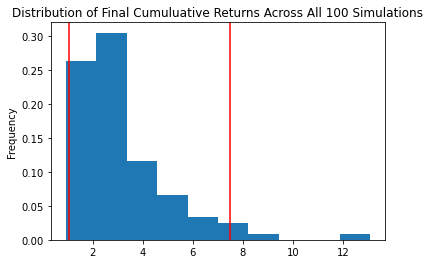

In [53]:
# Plot probability distribution and confidence intervals
dist_plot = MC_early_retirement_10_years.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_early_retirement_10_years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           100.000000
mean              3.240493
std               1.905779
min               0.933683
25%               2.040380
50%               2.772078
75%               3.887743
max              13.068771
95% CI Lower      1.077145
95% CI Upper      7.498054
Name: 2520, dtype: float64


C:\Users\MarcJulies\Jupyter-Workspace\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [55]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64628.71 and $449883.26
